In [70]:
import numpy as np
import matplotlib.pyplot as plt
import plot_contour as pc
import os
import pynbody
import kinetic_measure as km

In [83]:
savedir = '/home/seoyoung/analysis/long_slit/'
group_data = np.loadtxt("/home/seoyoung/analysis/romulus25_group_candidates_z0.txt", dtype = [('id_hal', float), ('mhal', float),('mgal',float)])

stacked_data = []
stacked_mhal = []
for ids in group_data['id_hal']:
    try:
        slit_data = np.loadtxt(savedir+'r25_halo'+str(ids)+'_long_slit_z_0.0_majax.txt')
        stacked_mhal = np.ones((3,1))*group_data['mhal'][group_data['id_hal']==ids][0]

        if stacked_data == []:
            stacked_data = np.hstack((stacked_mhal,slit_data[:3]))
        else:
            stacked_data = np.vstack((stacked_data,np.hstack((stacked_mhal,slit_data[:3]))))        
    except: pass

/home/seoyoung/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  # This is added back by InteractiveShellApp.init_path()


In [84]:
slit_data = np.array(stacked_data)
slit_data.shape

(105, 54)

In [96]:
mhal = slit_data[:,0]
rot_angles = slit_data[:,1:4]
r_list = slit_data[:,4:19]
v_list = slit_data[:,19:34]
sig_list = slit_data[:,34:49]
v_max = slit_data[:,49]
sig_0 = slit_data[:,50]
eta = slit_data[:,51]
ellip = slit_data[:,52]
dtheta = slit_data[:,53]

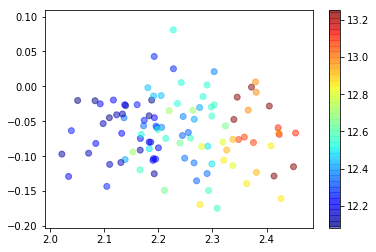

In [86]:
plt.scatter(np.log10(sig_0), eta, c = mhal, alpha = 0.5, cmap = 'jet')
plt.colorbar()


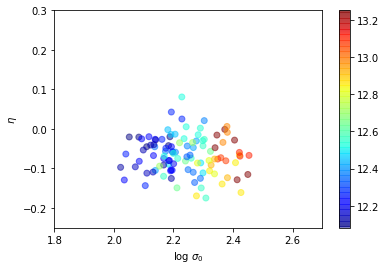

In [90]:
plt.scatter(np.log10(sig_0), eta, c = mhal, alpha = 0.5, cmap = 'jet')

plt.xlim(1.8,2.7)
plt.ylim(-0.25,0.3)
plt.gca().patch.set_alpha(0)

plt.xlabel("log $\sigma_{0}$")
plt.ylabel("$\eta$")
plt.colorbar()

plt.gca().patch.set_alpha(0)


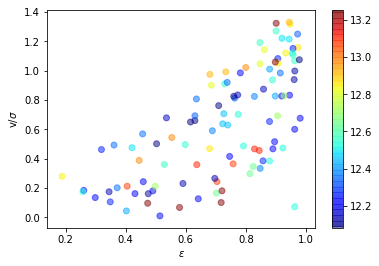

In [94]:
plt.scatter(ellip, v_max/sig_0, c = mhal, alpha = 0.5, cmap = 'jet')
plt.colorbar()

plt.xlabel("$\epsilon$")
plt.ylabel("v/$\sigma$")
plt.gca().patch.set_alpha(0)
